In [65]:
from cProfile import label

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv("netflix_titles.csv",encoding='latin1')

## Step 1: Understand the Data (Exploration)
    (1) How many total rows and columns are in the dataset?
    (2) What is the data type of each column (e.g., number, text, date)?
    (3) Are there any missing values in any column? If yes, which column has the most missing values?
    (4) Is there more content categorized as "Movie" or "TV Show" on Netflix? Show the count for each.
    (5) Initial Preview: Display the first 10 and last 10 rows of the dataset to see how the data is recorded.
    (6) Unique Values: How many unique categories are there in columns like type, rating, and country?
    (7) Value Counts: What are the counts of each category within the type column (i.e., how many Movies vs. TV
     Shows)? What are the top 10 most frequent values in country, director, and listed_in (genre)?
    (8) Numerical Summary: What are the basic descriptive statistics (mean, median, standard deviation, min, max) for numerical columns like release_year?
    (9) Timespan of Data: What is the earliest and latest release_year in the dataset? What about the date_added?

In [67]:
# 1. How many total rows and columns are in the dataset?
print(f"Total rows = {df.shape[0]} , column = {df.shape[1]}")

Total rows = 8807 , column = 12


In [68]:
# 2. What is the data type of each column (e.g., number, text, date)?
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [69]:
# 3. Are there any missing values in any column? If yes, which column has the most missing values?

# print(f"Most missing values column = {df.isnull().sum().index[np.argmax(df.isnull().sum().values)]}")

# best way
print(f"Most missing values column = {df.isnull().sum().idxmax()}")

Most missing values column = director


In [70]:
# 4. Is there more content categorized as "Movie" or "TV Show" on Netflix? Show the count for each.
print(f"there more content categorized as = {df.groupby('type')['show_id'].count().idxmax()}")
print(f"count for each = {df.groupby('type')['show_id'].count()}")

there more content categorized as = Movie
count for each = type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64


In [71]:
# 5. Initial Preview: Display the first 10 and last 10 rows of the dataset to see how the data is recorded.
print(f"first 10 = \n {df.head(10)}")
print(f"lst 10 = \n {df.tail(10)}")

first 10 = 
   show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                         director  \
0                 Kirsten Johnson   
1                             NaN   
2                 Julien Leclercq   
3                             NaN   
4                             NaN   
5                   Mike Flanagan   
6  Robert Cullen, JosÃ© Luis Ucha   
7                    Haile Gerima   
8                 Andy Devonshire   


In [72]:
# 6. Unique Values: How many unique categories are there in columns like type, rating, and country?

# print(f"type = {df['type'].unique().size}")
# print(f"rating = {df['rating'].unique().size}")
# print(f"country = {df['country'].unique().size}")

# Best Way
print(df[['type','rating','country']].nunique())

type         2
rating      17
country    748
dtype: int64


In [73]:
# 7. Value Counts: What are the counts of each category within the type column (i.e., how many Movies vs. TV Shows)? What are the top 10 most frequent values in country, director, and listed_in (genre)?

# print(f"count for each = {df.groupby('type')['show_id'].count()}")
# print(f"country = {df.groupby('country')['show_id'].count().sort_values(ascending=False).head(10)}")
# print(f"director = {df.groupby('director')['show_id'].count().sort_values(ascending=False).head(10)}")
# print(f'listed in = {df.groupby('listed_in')['show_id'].count().sort_values(ascending=False).head(10)}')

# best way
print("--- Type Counts ---")
print(df['type'].value_counts())
print("\n" + "="*30 + "\n") # For clean separation

print("--- Top 10 Countries ---")
print(df['country'].value_counts().head(10))
print("\n" + "="*30 + "\n")

print("--- Top 10 Directors ---")
print(df['director'].value_counts().head(10))
print("\n" + "="*30 + "\n")

print("--- Top 10 Genres (listed_in) ---")
print(df['listed_in'].value_counts().head(10))

--- Type Counts ---
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


--- Top 10 Countries ---
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


--- Top 10 Directors ---
director
Rajiv Chilaka              19
RaÃºl Campos, Jan Suter    18
Suhas Kadav                16
Marcus Raboy               16
Jay Karas                  14
Cathy Garcia-Molina        13
Martin Scorsese            12
Youssef Chahine            12
Jay Chapman                12
Steven Spielberg           11
Name: count, dtype: int64


--- Top 10 Genres (listed_in) ---
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies            

In [74]:
# 8. Numerical Summary: What are the basic descriptive statistics (mean, median, standard deviation, min, max) for numerical columns like release_year?
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [75]:
# 9. Timespan of Data: What is the earliest and latest release_year in the dataset? What about the date_added?
# print(df['release_year'].max())
# print(df['release_year'].min())
df['date_added']=pd.to_datetime(df['date_added'].str.strip())
print(df['date_added'].max())
print(df['date_added'].min())

2021-09-25 00:00:00
2008-01-01 00:00:00



## Step 2: Clean the Data (Cleaning & Preprocessing)
    (1) How would you handle the missing values in the date_added column? Would you remove them or fill them with a
     default value?
    (2) The rating column also has missing values. Fill them with the most frequently occurring rating (the mode).
    (3)The cast and director columns also have null values. For now, you can leave them, but think about how you might
     handle them.
    (4) Handling Missing Directors/Cast/Country: Decide on a strategy for the missing values in director, cast, and country. Should you fill them
     with a placeholder like "Unknown" or drop the rows? Justify your choice.
    (5) Fixing Missing Ratings: The rating column has missing values. How would you fill them? A good approach is to use the mode (the most
     frequently occurring rating).
    (6) Managing Missing Dates: Address the missing values in date_added. Is it better to drop these few rows or fill them with the release_year?
    (7) Data Type Conversion: The date_added column is currently a string (object). Convert it to a proper datetime format so you can perform
    time-based analysis.
    (8) Cleaning the Duration Column: The duration column contains mixed data (e.g., "100 min" for movies, "2 Seasons" for TV shows). Separate the
     dataset into two: one for Movies and one for TV Shows. For the Movie dataset, convert the duration column to a numerical type (integer) by
      removing "min". Do the same for the TV Show dataset, converting seasons to an integer.
    (9) Handling Duplicates: Check if there are any duplicate rows in the dataset and remove them if they exist.
    (10) Standardizing Genres: The listed_in column often contains multiple genres in one string (e.g., "Dramas, International Movies"). Should you
     split these into a list or just use the primary genre for analysis?

In [76]:
# 1. How would you handle the missing values in the date_added column? Would you remove them or fill them with a default value?
df.dropna(subset=['date_added'],inplace=True)

In [77]:
# 2. The rating column also has missing values. Fill them with the most frequently occurring rating (the mode).
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

C:\Users\ansh\AppData\Local\Temp\ipykernel_20596\3430456595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0],inplace=True)


In [78]:
# 3. The cast and director columns also have null values. For now, you can leave them, but think about how you might handle them.
df.info()
'''
Strategy 1: Fill with a Placeholder (Jagya Purvi)
    - This is the most common and safest approach for text columns like cast and director.
    - What to do: Instead of leaving the cells blank, we can fill them with a placeholder word like "Unknown", "Not Available", or "No Director".
    - Why it's a good idea:
        - No Data Loss: We don't have to delete the entire row. We can still use the information from other columns like release_year, country, and rating for our analysis.
        - Clarity: It clearly tells us that the information was missing, not that the movie had no director or cast.
        - Easy Analysis: We can later easily count how many movies have an "Unknown" director or filter them out if needed.

Strategy 2: Do Nothing (Kaai Na Karvu)
    - Sometimes, the best action is no action.
    - What to do: Leave the missing values as they are (NaN).
    - Why it might work:
        - Specific Analysis: If you are only analyzing trends by country or release year, the director and cast columns don't matter. Pandas is smart enough to ignore missing values during many calculations (like counting).
        - Honesty: It keeps the data in its original, raw state.
    - The downside: This can cause errors or unexpected results in certain analyses, especially if you try to search for a specific director's name.

Strategy 3: Deleting Rows (Rows Kadhi Nakhvi)
    - This is a more aggressive approach and generally not recommended for these columns.
    - What to do: Delete any row where the director or cast information is missing.
    - Why it's risky:
        - Major Data Loss: The director column has thousands of missing values. Deleting all those rows would mean throwing away a large portion of our dataset (almost 30%). This would make our overall analysis much less reliable.
'''

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


'\nStrategy 1: Fill with a Placeholder (Jagya Purvi)\n    - This is the most common and safest approach for text columns like cast and director.\n    - What to do: Instead of leaving the cells blank, we can fill them with a placeholder word like "Unknown", "Not Available", or "No Director".\n    - Why it\'s a good idea:\n        - No Data Loss: We don\'t have to delete the entire row. We can still use the information from other columns like release_year, country, and rating for our analysis.\n        - Clarity: It clearly tells us that the information was missing, not that the movie had no director or cast.\n        - Easy Analysis: We can later easily count how many movies have an "Unknown" director or filter them out if needed.\n\nStrategy 2: Do Nothing (Kaai Na Karvu)\n    - Sometimes, the best action is no action.\n    - What to do: Leave the missing values as they are (NaN).\n    - Why it might work:\n        - Specific Analysis: If you are only analyzing trends by country or rele

In [79]:
# 4. Handling Missing Directors/Cast/Country: Decide on a strategy for the missing values in director, cast, and country. Should you fill them with a placeholder like "Unknown" or drop the rows? Justify your choice.
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

C:\Users\ansh\AppData\Local\Temp\ipykernel_20596\1844306670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\ansh\AppData\Local\Temp\ipykernel_20596\1844306670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [80]:
# 5. Fixing Missing Ratings: The rating column has missing values. How would you fill them? A good approach is to use the mode (the most frequently occurring rating).
# Already done in step 2

In [81]:
# 6. Managing Missing Dates: Address the missing values in date_added. Is it better to drop these few rows or fill them with the release_year?
# Already done in step 1

In [82]:
# 7. Data Type Conversion: The date_added column is currently a string (object). Convert it to a proper datetime format so you can perform time-based analysis.
# Already done in exploration step 9

In [83]:
# 8. Cleaning the Duration Column: The duration column contains mixed data (e.g., "100 min" for movies, "2 Seasons" for TV shows). Separate the dataset into two: one for Movies and one for TV Shows. For the Movie dataset, convert the duration column to a numerical type (integer) by removing "min". Do the same for the TV Show dataset, converting seasons to an integer.
df['duration']=df['duration'].str.replace('min','',regex=False)
mask=df['type']=='Movie'
df['movie_duration']=pd.to_numeric(df.loc[mask,'duration'])

df['duration']=df['duration'].str.replace('s','',regex=False)
df['duration']=df['duration'].str.replace('Seaon','',regex=False)
mask1=df['type']=='TV Show'
df['tv_show_duration']=pd.to_numeric(df.loc[mask1,'duration'])

In [84]:
# 9. Handling Duplicates: Check if there are any duplicate rows in the dataset and remove them if they exist.
df[df.duplicated()] # not available

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,tv_show_duration


In [85]:
# 10. Standardizing Genres: The listed_in column often contains multiple genres in one string (e.g., "Dramas, International Movies"). Should you split these into a list or just use the primary genre for analysis?
df['listed_in']=df['listed_in'].str.split(',')

## Step 3: Gain Insights from Data (Analysis & Transformation)
    (1) In which year was the most content released? Find the top 5 years using the release_year column.
    (2) In which month was the most content added? (Use the date_added column).
    (3) Who are the top 5 directors with the most movies?
    (4) Who are the top 10 actors who have appeared in the most movies/shows?
    (5) Create a list of all Movies that were produced in India (country = 'India').
    (6) Feature Engineering (Time): From the date_added (datetime) column, create new columns for added_year, added_month,
     and added_day_of_week.
    (7) Old vs. New Content: What is the average time lag between the release_year and the date_added? This tells you how
     old content generally is when it arrives on Netflix.
    (8) Content by Decade: Create a new column called release_decade (e.g., 1990s, 2000s, 2010s). Which decade has produced
     the most content?
    (9) Longest Movies: After cleaning the duration column, find the top 10 longest movies on Netflix.
    (10) Most Seasons in TV Shows: Find the top 10 TV shows with the most seasons.
    (11) Director-Genre Specialization: Find the top director for the "Dramas" genre. Who is the top director for "Comedies"?
    (12) Actor-Director Collaboration: Which actor and director pair has collaborated the most?
    (13) Country-Specific Analysis: What is the most common genre for content produced in 'India'? What about in the 'United
     States'?
    (14) Content Targeting: Which rating is most common for Movies? Is it different for TV Shows?
    (15) Text Analysis: Analyze the description column. What are the most common words found in the descriptions of 'Horror'
     Movies'?

In [86]:
# 1. In which year was the most content released? Find the top 5 years using the release_year column.
print(f'{df['release_year'].value_counts().idxmax()} year was the most content released')
print(f'top 5 years = \n{df['release_year'].value_counts().head(5)}')

2018 year was the most content released
top 5 years = 
release_year
2018    1146
2017    1032
2019    1030
2020     953
2016     901
Name: count, dtype: int64


In [87]:
# 2. In which month was the most content added? (Use the date_added column).
print(f'{df['date_added'].dt.month_name().value_counts().idxmax()} month was the most content added')

July month was the most content added


In [88]:
# 3. Who are the top 5 directors with the most movies?
masked=(df['type']=='Movie') & (df['director']!='Unknown')
print(f'top 5 directors with the most movies = \n{df[masked]['director'].value_counts().head()}')

# another way
# print(f'top 5 directors with the most movies = \n{df[df['type']=='Movie']['director'].value_counts().drop('Unknown').head()}')

top 5 directors with the most movies = 
director
Rajiv Chilaka              19
RaÃºl Campos, Jan Suter    18
Suhas Kadav                16
Marcus Raboy               15
Jay Karas                  14
Name: count, dtype: int64


In [89]:
# 4. Who are the top 10 actors who have appeared in the most movies/shows?
# df['cast']=df['cast'].str.split(',')
# df['cast'] = df['cast'].apply(lambda cast_list: [actor.strip() for actor in cast_list])
print(f'the top 10 actors who have appeared in the most movies/shows = \n{df.explode('cast')['cast'].value_counts().drop('Unknown').head(10)}')
'''
.explode() Method Shu Chhe?
.explode() method e darek list na andar na badha j items ne alag-alag row ma gotthvi de chhe. E list ne 'fodi' ne tena darek tukda ne ek navi, alag line aapi de chhe.

Example
Mani lo ke tamaro data aavo chhe (explode karya pehla):

  show_id                             listed_in
0      s1             ['Dramas', 'International']
1      s2                        ['Comedies']
2      s3  ['Action & Adventure', 'Comedies']
Have, jyare aapde .explode('listed_in') vaprisu, to data aavo thai jashe (explode karya pachhi):

  show_id             listed_in
0      s1                Dramas
0      s1         International
1      s2              Comedies
2      s3  Action & Adventure
2      s3              Comedies
'''

the top 10 actors who have appeared in the most movies/shows = 
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Kevin Hart                                                                                                                 6
David Spade, London Hughes, Fortune Feimster                                                                               6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Craig Sechler                                           

"\n.explode() Method Shu Chhe?\n.explode() method e darek list na andar na badha j items ne alag-alag row ma gotthvi de chhe. E list ne 'fodi' ne tena darek tukda ne ek navi, alag line aapi de chhe.\n\nExample\nMani lo ke tamaro data aavo chhe (explode karya pehla):\n\n  show_id                             listed_in\n0      s1             ['Dramas', 'International']\n1      s2                        ['Comedies']\n2      s3  ['Action & Adventure', 'Comedies']\nHave, jyare aapde .explode('listed_in') vaprisu, to data aavo thai jashe (explode karya pachhi):\n\n  show_id             listed_in\n0      s1                Dramas\n0      s1         International\n1      s2              Comedies\n2      s3  Action & Adventure\n2      s3              Comedies\n"

In [90]:
# 5. Create a list of all Movies that were produced in India (country = 'India').
mask=(df['country']=='India')&(df['type']=='Movie')
print(df[mask])

     show_id   type                  title                 director  \
24       s25  Movie                  Jeans               S. Shankar   
105     s106  Movie       Angamaly Diaries     Lijo Jose Pellissery   
114     s115  Movie                 Anjaam             Rahul Rawail   
116     s117  Movie                 Dhanak          Nagesh Kukunoor   
118     s119  Movie                Gurgaon            Shanker Raman   
...      ...    ...                    ...                      ...   
8772   s8773  Movie  Yamla Pagla Deewana 2           Sangeeth Sivan   
8773   s8774  Movie    Yanda Kartavya Aahe             Kedar Shinde   
8798   s8799  Movie               Zed Plus  Chandra Prakash Dwivedi   
8799   s8800  Movie                  Zenda           Avadhoot Gupte   
8806   s8807  Movie                 Zubaan              Mozez Singh   

                                                   cast country date_added  \
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   India 2021-

In [91]:
# 6. Feature Engineering (Time): From the date_added (datetime) column, create new columns for added_year, added_month, and added_day_of_week.
df['added_day_of_week']=df['date_added'].dt.day_of_week
df['added_month']=df['date_added'].dt.month
df['added_year']=df['date_added'].dt.year

In [92]:
# 7. Old vs. New Content: What is the average time lag between the release_year and the date_added? This tells you how old content generally is when it arrives on Netflix.
print(f'the average time lag between the release_year and the date_added is {(df['added_year']-df['release_year']).mean()}')

the average time lag between the release_year and the date_added is 4.688416505626918


In [93]:
# 8. Content by Decade: Create a new column called release_decade (e.g., 1990s, 2000s, 2010s). Which decade has produced the most content?
decade_start = (df['release_year'] // 10) * 10

df['release_decade'] = decade_start.astype(str) + 's'
most_common_decade = df['release_decade'].value_counts().idxmax()
print(f'the decade has produced the most content = {most_common_decade}')

the decade has produced the most content = 2010s


In [94]:
# 9. Longest Movies: After cleaning the duration column, find the top 10 longest movies on Netflix.

# print(f'the top 10 longest movies on Netflix = \n{df.loc[df['movie_duration'].sort_values(ascending=False).index]['title'].head(10)}')

# best way
print(f'the top 10 longest movies on Netflix = \n{df.sort_values(by='movie_duration', ascending=False)['title'].head(10)}')

the top 10 longest movies on Netflix = 
4253     Black Mirror: Bandersnatch
717     Headspace: Unwind Your Mind
2491         The School of Mischief
2487                 No Longer kids
2484             Lock Your Girls In
2488                Raya and Sakina
166     Once Upon a Time in America
7932                         Sangam
1019                         Lagaan
4573                   Jodhaa Akbar
Name: title, dtype: object


In [95]:
# 10. Most Seasons in TV Shows: Find the top 10 TV shows with the most seasons.
df.sort_values(by='tv_show_duration',ascending=False)[['title','tv_show_duration']].head(10)

,title,tv_show_duration
548,Grey's Anatomy,17.0
2423,Supernatural,15.0
4798,NCIS,15.0
4220,COMEDIANS of the world,13.0
1354,Heartland,13.0
4964,Trailer Park Boys,12.0
5412,Criminal Minds,12.0
6456,Cheers,11.0
1622,Stargate SG-1,10.0
2203,Shameless (U.S.),10.0


In [96]:
# 11. Director-Genre Specialization: Find the top director for the "Dramas" genre. Who is the top director for "Comedies"?
df['listed_in'] = df['listed_in'].apply(lambda cast_list: [actor.strip() for actor in cast_list])
explode_list=df.explode('listed_in')
print(f'for drama = \n{explode_list[explode_list['listed_in']=='Dramas'].groupby('director')['show_id'].count().sort_values(ascending=False).drop('Unknown').head()}')
print(f'for comedy = \n{explode_list[explode_list['listed_in']=='Comedies'].groupby('director')['show_id'].count().sort_values(ascending=False).drop('Unknown').head()}')

for drama = 
director
Youssef Chahine        12
Cathy Garcia-Molina     9
Martin Scorsese         9
Hidenori Inoue          7
S.S. Rajamouli          7
Name: show_id, dtype: int64
for comedy = 
director
David Dhawan           9
Hakan AlgÃ¼l           8
Suhas Kadav            8
Cathy Garcia-Molina    7
Prakash Satam          7
Name: show_id, dtype: int64


In [97]:
# 12. Actor-Director Collaboration: Which actor and director pair has collaborated the most?
clean_df = df[(df['director'] != 'Unknown') & (df['cast'].apply(lambda x: x != ['Unknown']))]
clean_df.explode('cast').groupby(['cast','director'])['show_id'].count().sort_values(ascending=False).head(10)

cast                                                                                                     director           
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                  Rajiv Chilaka          12
Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep     S.S. Rajamouli          4
Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madhuri, Pavel Navageethan, Avantika Vandanapu                 Rathindran R Prasad     4
Unknown                                                                                                  HernÃ¡n Zin             4
Louis C.K.                                                                                               Louis C.K.              3
Dave Chappelle                                                                                           Stan Lathan             3
Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Ramya Krishnan, Nas

In [98]:
# 13. Country-Specific Analysis: What is the most common genre for content produced in 'India'? What about in the 'United States'?
explode_list=df.explode('listed_in')
print(f'india = {explode_list[explode_list['country'].str.contains('India', na=False)].groupby('listed_in')['show_id'].count().idxmax()}')
print(f'Usa = {explode_list[explode_list['country'].str.contains('United States', na=False)].groupby('listed_in')['show_id'].count().idxmax()}')

india = International Movies
Usa = Dramas


In [99]:
# 14. Content Targeting: Which rating is most common for Movies? Is it different for TV Shows?
print(f'common rating for movie = {df[df['type']=='Movie']['rating'].value_counts().idxmax()}')
print(f'common rating for Tv show = {df[df['type']=='TV Show']['rating'].value_counts().idxmax()}')

common rating for movie = TV-MA
common rating for Tv show = TV-MA


In [100]:
# 15. Text Analysis: Analyze the description column. What are the most common words found in the descriptions of 'Horror Movies'?

# Pehla, 'Horror Movies' na description alag karo
horror_desc = explode_list[explode_list['listed_in'] == 'Horror Movies']['description']

# Step 1: Text ne saaf karo (lowercase + punctuation kadho)
# [^\w\s] e badha j punctuation ne kadhi nakhshe
cleaned_desc = horror_desc.str.lower().str.replace('[^\w\s]', '', regex=True)

# Step 2: Shabdo ne alag kari ne explode karo
all_words = cleaned_desc.str.split(' ').explode()

# Step 3: Faltu shabdo (Stop Words) ni list banavo
stop_words = ['a', 'the', 'in', 'is', 'of', 'to', 'and', 'his', 'her', 'their', 'with', 'for', 'an', 'as', 'at', 'by', 'on']

# Step 4: Ganatri karo ANE stop words ne kadhi nakho
# .isin() method check karshe ke shabd stop_words ni list ma chhe ke nahi
word_counts = all_words.value_counts()
meaningful_words = word_counts[~word_counts.index.isin(stop_words)]


print("--- Top 10 Meaningful Words in Horror Movie Descriptions ---")
print(meaningful_words.head(10))

--- Top 10 Meaningful Words in Horror Movie Descriptions ---
description
when     98
that     67
after    58
from     48
into     47
young    45
but      43
home     39
they     36
new      35
Name: count, dtype: int64


<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ansh\AppData\Local\Temp\ipykernel_20596\1058794362.py:8: SyntaxWarning: invalid escape sequence '\w'
  cleaned_desc = horror_desc.str.lower().str.replace('[^\w\s]', '', regex=True)


## Step 4: Visualize the Data (Plotting) 📊
    (1) Create a bar chart to show the count of Movies vs. TV Shows available on Netflix.
    (2) Create a histogram to show the distribution of release_year. (e.g., how many titles were released in the
     1990s, 2000s, etc.).
    (3) Create a bar chart showing the top 10 countries that produce the most content.
    (4) What is the proportion of different ratings (e.g., TV-MA, TV-14, R)? You can create a pie chart for this.
    (5) Create a line chart that shows the number of titles added each year (release_year). This will give you a trend
     of content growth over time.

     Comparisons & Rankings (Bar Charts)
        (11) Content Type Distribution: Create a bar chart comparing the total number of Movies vs. TV Shows.
        (6) Top Content-Producing Countries: Visualize the top 10 countries with the most content using a horizontal bar
         chart.
        (7) Most Common Genres: Create a bar chart showing the top 15 most common genres.
        (8) Peak Addition Months: Create a bar chart showing the number of titles added per month. Which are the busiest
         months?
        (9) Audience Ratings Distribution: Use a bar chart to show the count of content across different ratings.
        (10) Movies vs. TV Shows by Country: Create a stacked bar chart for the top 10 countries, showing the proportion
         of Movies vs. TV Shows within each country.

    Trends Over Time (Line Charts)
        (12) Content Growth Over Years: Plot a line chart showing the number of titles added to Netflix each year.
        (13) Separate Growth Trends: On a single graph, plot two lines: one for the growth of Movies and one for TV Shows
         added over time.
        (14) Cumulative Content Growth: Create a line chart showing the cumulative sum of content added over the years.

    Distributions (Histograms & Box Plots)
        (15) Release Year Distribution: Create a histogram to understand the distribution of content based on
         release_year.
        (16) Movie Duration Analysis: Create a histogram to show the distribution of movie durations (in minutes).
        (17) TV Show Season Analysis: Create a histogram to see the distribution of the number of seasons for TV shows.
        (18) Duration Outliers: Use a box plot to visualize the spread of movie durations and identify outliers.
        (19) Duration by Rating: Create box plots to compare movie durations across different ratings (e.g., 'R',
         'PG-13').

    Proportions & Text (Pie Charts & Word Clouds)
        (20) Content Type Share: Create a pie chart to show the percentage share of Movies vs. TV Shows.
        (21) Common Genre Keywords: Create a word cloud from the listed_in column to visually represent the most frequent
         genre tags.

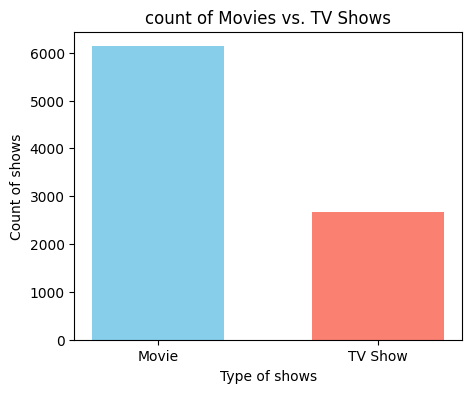

In [152]:
# 1. Create a bar chart to show the count of Movies vs. TV Shows available on Netflix.
x=df.groupby('type')['show_id'].count().index
height=df.groupby('type')['show_id'].count().values
plt.figure(figsize=(5, 4))
plt.bar(x,height,align='center',color=['skyblue', 'salmon'], width=0.6)
plt.xlabel("Type of shows")
plt.ylabel("Count of shows")
plt.title("count of Movies vs. TV Shows")
plt.show()

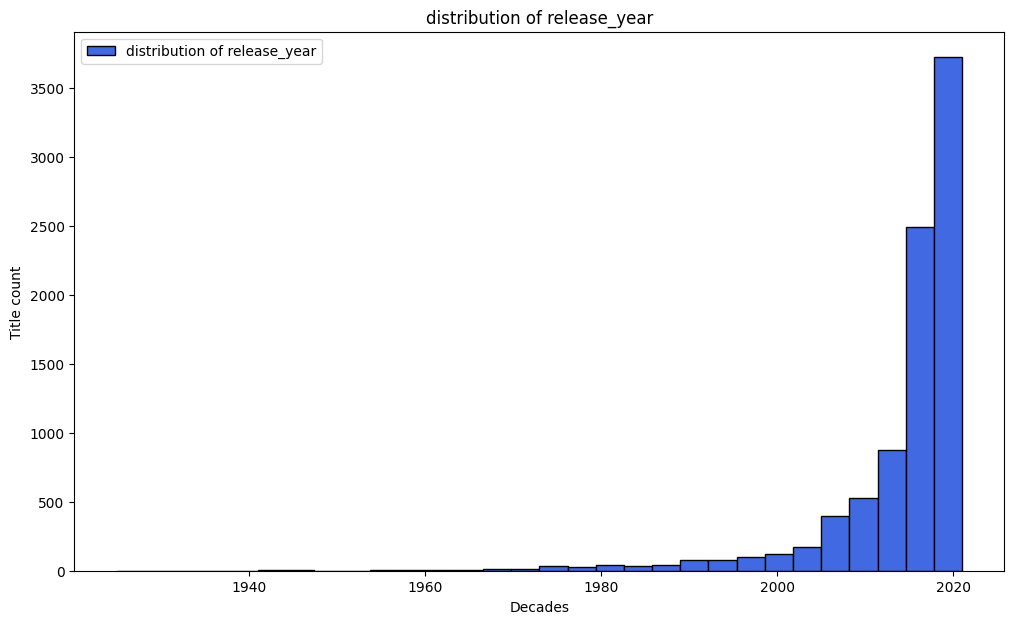

In [182]:
# 2. Create a histogram to show the distribution of release_year. (e.g., how many titles were released in the 1990s, 2000s, etc.).
y=df['release_decade'].value_counts().sort_index().values
x=df['release_decade'].value_counts().sort_index().index
plt.figure(figsize=(12,7))
plt.hist(df['release_year'], bins=30, color='royalblue', edgecolor='black',label='distribution of release_year')
plt.xlabel("Decades")
plt.ylabel("Title count")
plt.title("distribution of release_year")
plt.legend()
plt.show()

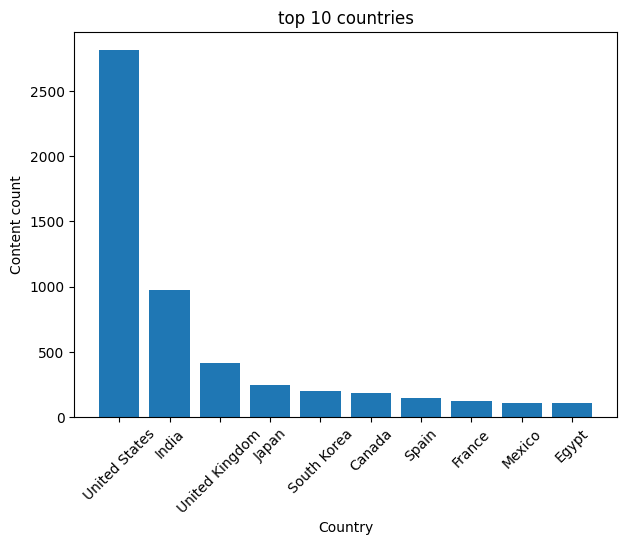

In [202]:
# 3. Create a bar chart showing the top 10 countries that produce the most content.
plt.figure(figsize=(7,5))
country=df['country'].value_counts().head(10)
plt.bar(country.index,country.values)
plt.xlabel("Country")
plt.ylabel("Content count")
plt.title("top 10 countries")
plt.xticks(country.index,rotation=45)
plt.show()

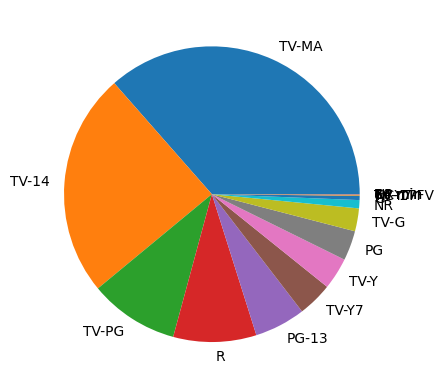

In [207]:
# 4. What is the proportion of different ratings (e.g., TV-MA, TV-14, R)? You can create a pie chart for this.
rating=df['rating'].value_counts()
plt.pie(rating.values,labels=rating.index)
plt.show()

In [105]:
# 5. Create a line chart that shows the number of titles added each year (release_year). This will give you a trend of content growth over time.

In [106]:
# 6. Top Content-Producing Countries: Visualize the top 10 countries with the most content using a horizontal bar chart.

In [107]:
# 7. Most Common Genres: Create a bar chart showing the top 15 most common

In [108]:
# 8. Peak Addition Months: Create a bar chart showing the number of titles added per month. Which are the busiest months?

In [109]:
# 9. Audience Ratings Distribution: Use a bar chart to show the count of content across different ratings.

In [110]:
# 10. Movies vs. TV Shows by Country: Create a stacked bar chart for the top 10 countries, showing the proportion of Movies vs. TV Shows within each country.

In [111]:
# 11. Content Type Distribution: Create a bar chart comparing the total number of Movies vs. TV Shows.

In [112]:
# 12. Content Growth Over Years: Plot a line chart showing the number of titles added to Netflix each year.

In [113]:
# 13. Separate Growth Trends: On a single graph, plot two lines: one for the growth of Movies and one for TV Shows added over time.

In [114]:
# 14. Cumulative Content Growth: Create a line chart showing the cumulative sum of content added over the years.

In [115]:
# 15. Release Year Distribution: Create a histogram to understand the distribution of content based on release_year.

In [116]:
# 16. Movie Duration Analysis: Create a histogram to show the distribution of movie durations (in minutes).

In [117]:
# 17. TV Show Season Analysis: Create a histogram to see the distribution of the number of seasons for TV shows.

In [118]:
# 18. Duration Outliers: Use a box plot to visualize the spread of movie durations and identify outliers.

In [119]:
# 19. Duration by Rating: Create box plots to compare movie durations across different ratings (e.g., 'R', 'PG-13').

In [120]:
# 20. Content Type Share: Create a pie chart to show the percentage share of Movies vs. TV Shows.